# Decision Tree Modeling for Weather Data

# 1. Import Libraries & Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    f1_score,
    accuracy_score
)

python(2248) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [2]:
# Set path to dataset
path = '/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/02 Data/Prepared Data/'

In [3]:
# Import Scaled Weather Data
df_weather = pd.read_csv(os.path.join(path, "Dataset-scaled.csv"))

In [4]:
# Check import
df_weather.head()

,id,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,19600102,-1.599964,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,19600103,-1.599964,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,19600104,-1.599964,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,19600105,-1.599964,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [5]:
# Import Pleasant Weather Answer Key
df_answer = pd.read_csv(os.path.join(path, "Dataset-Weather_Prediction_Pleasant_Weather.csv"))

In [6]:
# Check import
df_answer.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
print("Weather data shape:", df_weather.shape)
print("Answers data shape:", df_answer.shape)

Weather data shape: (22950, 171)
Answers data shape: (22950, 16)


# 2. Data Prep

In [8]:
columns = df_weather.columns.tolist()

In [9]:
len(columns)

171

In [10]:
# Drop columns of 3 stations without labels
to_remove = ['GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
              'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
            'TOURS_temp_max']

In [11]:
for col in to_remove:
    columns.remove(col)

In [12]:
len(columns)

150

In [14]:
df_dt = df_weather[columns]

In [15]:
df_dt.head()

,id,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,19600102,-1.599964,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,19600103,-1.599964,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,19600104,-1.599964,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,19600105,-1.599964,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [16]:
df_dt.shape

(22950, 150)

# 3. Data Split

In [17]:
# Drop unnecessary columns
X = df_dt.drop(columns=['DATE', 'MONTH'])
y = df_answer.drop(columns=['DATE'])

In [18]:
print(X.shape)
print(y.shape)

(22950, 148)
(22950, 15)


In [19]:
# Training & Testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True)

In [20]:
print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)

Train shapes: (17212, 148) (17212, 15)
Test shapes: (5738, 148) (5738, 15)


# 4. Decision Tree Classifier

In [21]:
# Run a Decision Tree classifier

def run_tree_scenario(max_depth=None, min_samples_leaf=1, random_state=42):
    tree_clf = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        random_state=random_state
    )
    tree_clf.fit(X_train, y_train)

    y_pred_train = tree_clf.predict(X_train)
    y_pred_test  = tree_clf.predict(X_test)

    train_f1 = f1_score(y_train.values.ravel(), y_pred_train.ravel(), average="macro")
    test_f1  = f1_score(y_test.values.ravel(),  y_pred_test.ravel(),  average="macro")

    return tree_clf, y_pred_train, y_pred_test, train_f1, test_f1


In [23]:
# Run Decision Tree Scenarios
# Scenario 1 = unpruned tree (example baseline)
# Scenarios 2/3 = simple pruning trials

tree_scenarios = [
    {"name": "Scenario 1 (Unpruned)", "max_depth": None, "min_samples_leaf": 1},
    {"name": "Scenario 2 (Pruned depth=10)", "max_depth": 10, "min_samples_leaf": 1},
    {"name": "Scenario 3 (Pruned leaf>=20)", "max_depth": None, "min_samples_leaf": 20},
]

tree_results = []

for s in tree_scenarios:
    print("\n==============================")
    print(s["name"], "| max_depth:", s["max_depth"], "| min_samples_leaf:", s["min_samples_leaf"])

    clf, y_pred_train, y_pred_test, train_f1, test_f1 = run_tree_scenario(
        max_depth=s["max_depth"],
        min_samples_leaf=s["min_samples_leaf"]
    )

    print(f"Train macro-F1: {train_f1:.4f}")
    print(f"Test  macro-F1: {test_f1:.4f}")

    tree_results.append({
        "name": s["name"],
        "max_depth": s["max_depth"],
        "min_samples_leaf": s["min_samples_leaf"],
        "clf": clf,
        "y_pred_train": y_pred_train,
        "y_pred_test": y_pred_test,
        "train_f1": train_f1,
        "test_f1": test_f1
    })

# Summary table
pd.DataFrame([{
    "Scenario": r["name"],
    "max_depth": r["max_depth"],
    "min_samples_leaf": r["min_samples_leaf"],
    "Train macro-F1": round(r["train_f1"], 4),
    "Test macro-F1": round(r["test_f1"], 4)
} for r in tree_results])



Scenario 1 (Unpruned) | max_depth: None | min_samples_leaf: 1
Train macro-F1: 1.0000
Test  macro-F1: 0.9221

Scenario 2 (Pruned depth=10) | max_depth: 10 | min_samples_leaf: 1
Train macro-F1: 0.9502
Test  macro-F1: 0.9268

Scenario 3 (Pruned leaf>=20) | max_depth: None | min_samples_leaf: 20
Train macro-F1: 0.9329
Test  macro-F1: 0.9236


,Scenario,max_depth,min_samples_leaf,Train macro-F1,Test macro-F1
0,Scenario 1 (Unpruned),NaN,1,1.0000,0.9221
1,Scenario 2 (Pruned depth=10),10.0,1,0.9502,0.9268
2,Scenario 3 (Pruned leaf>=20),NaN,20,0.9329,0.9236


In [24]:
# Pick best scenario based on Test macro-F1

best_idx = np.argmax([r["test_f1"] for r in tree_results])
best_tree = tree_results[best_idx]

print("\nBest Decision Tree scenario by Test macro-F1:")
print(best_tree["name"])
print("Train macro-F1:", best_tree["train_f1"])
print("Test  macro-F1:", best_tree["test_f1"])

best_clf = best_tree["clf"]
best_y_pred_test = best_tree["y_pred_test"]



Best Decision Tree scenario by Test macro-F1:
Scenario 2 (Pruned depth=10)
Train macro-F1: 0.9502058587152657
Test  macro-F1: 0.9268388426812153


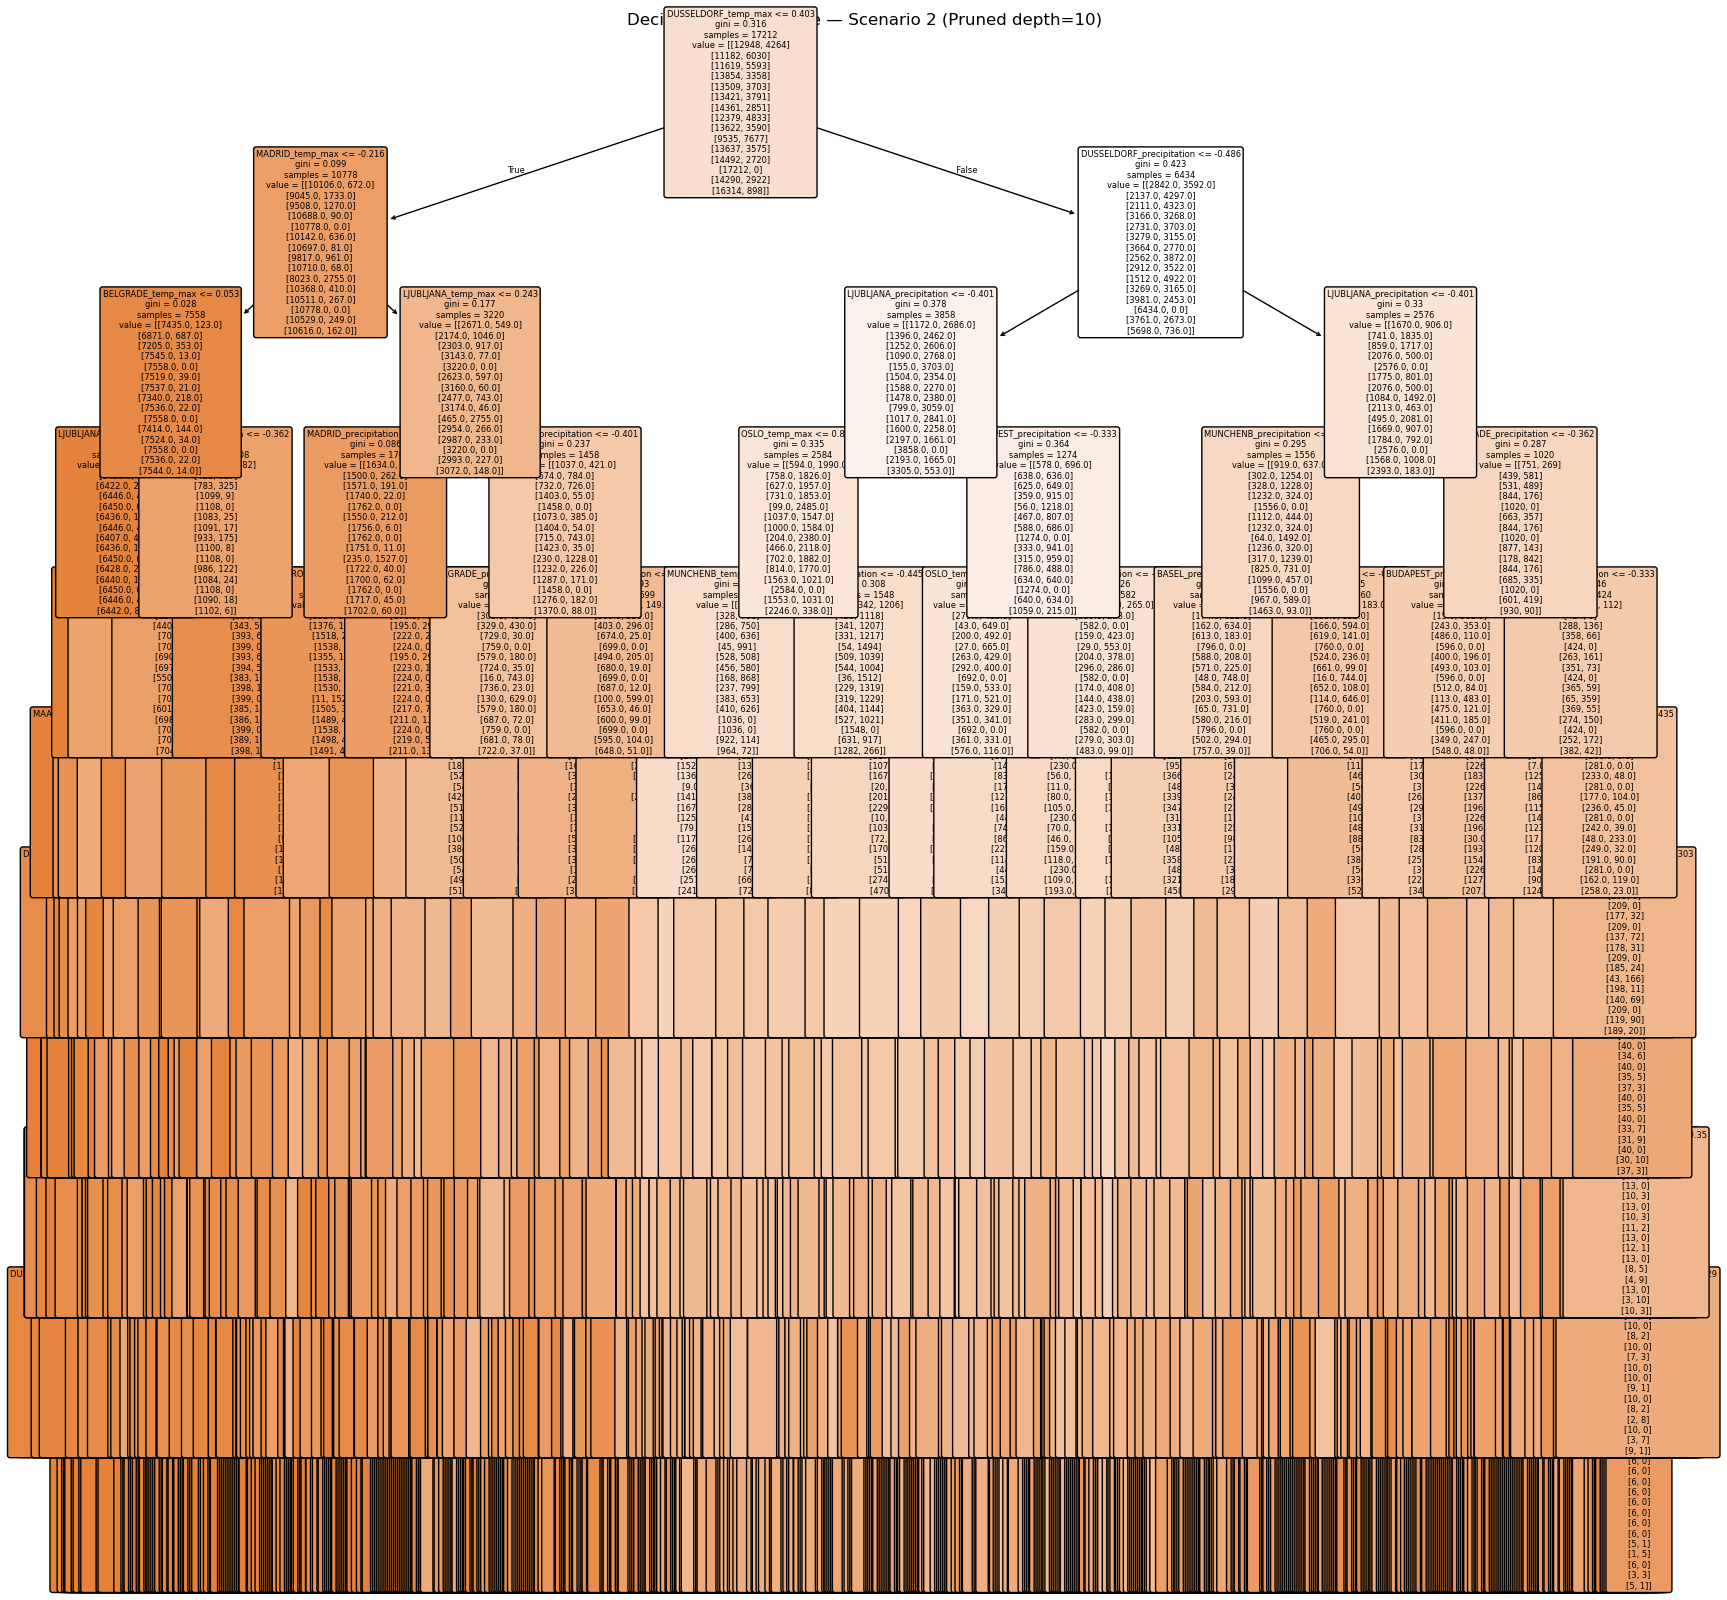

In [25]:
# Visualize the best decision tree

from sklearn import tree
plt.figure(figsize=(20, 20))
tree.plot_tree(
    best_clf,
    feature_names=X_train.columns,
    class_names=["unpleasant", "pleasant"],  # optional
    filled=True,
    rounded=True,
    fontsize=6
)
plt.title(f"Decision Tree Structure — {best_tree['name']}")

# Export visual
save_path = "/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/04 Analysis/Visualizations/DecisionTree.png"
plt.savefig(save_path, dpi=300)
plt.show()


## Classification Reports

In [26]:
# Classification reports

# Flattened
print("\n=== Overall classification report (flattened) ===")
print(classification_report(
    y_test.values.ravel(),
    best_y_pred_test.ravel(),
    zero_division=0
))

# Unflattened (per-station report)
print("\n=== Per-station classification report (unflattened) ===")
print(classification_report(
    y_test,
    best_y_pred_test,
    zero_division=0
))



=== Overall classification report (flattened) ===
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     67859
           1       0.87      0.90      0.89     18211

    accuracy                           0.95     86070
   macro avg       0.92      0.93      0.93     86070
weighted avg       0.95      0.95      0.95     86070


=== Per-station classification report (unflattened) ===
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1400
           1       0.92      0.97      0.95      1962
           2       0.89      0.96      0.92      1838
           3       0.81      0.85      0.83      1101
           4       0.97      1.00      0.98      1231
           5       0.73      0.78      0.75      1168
           6       0.87      0.87      0.87       923
           7       0.96      0.99      0.98      1543
           8       0.82      0.89      0.86      1176
           9       0.92 

## Confusion Matrix

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


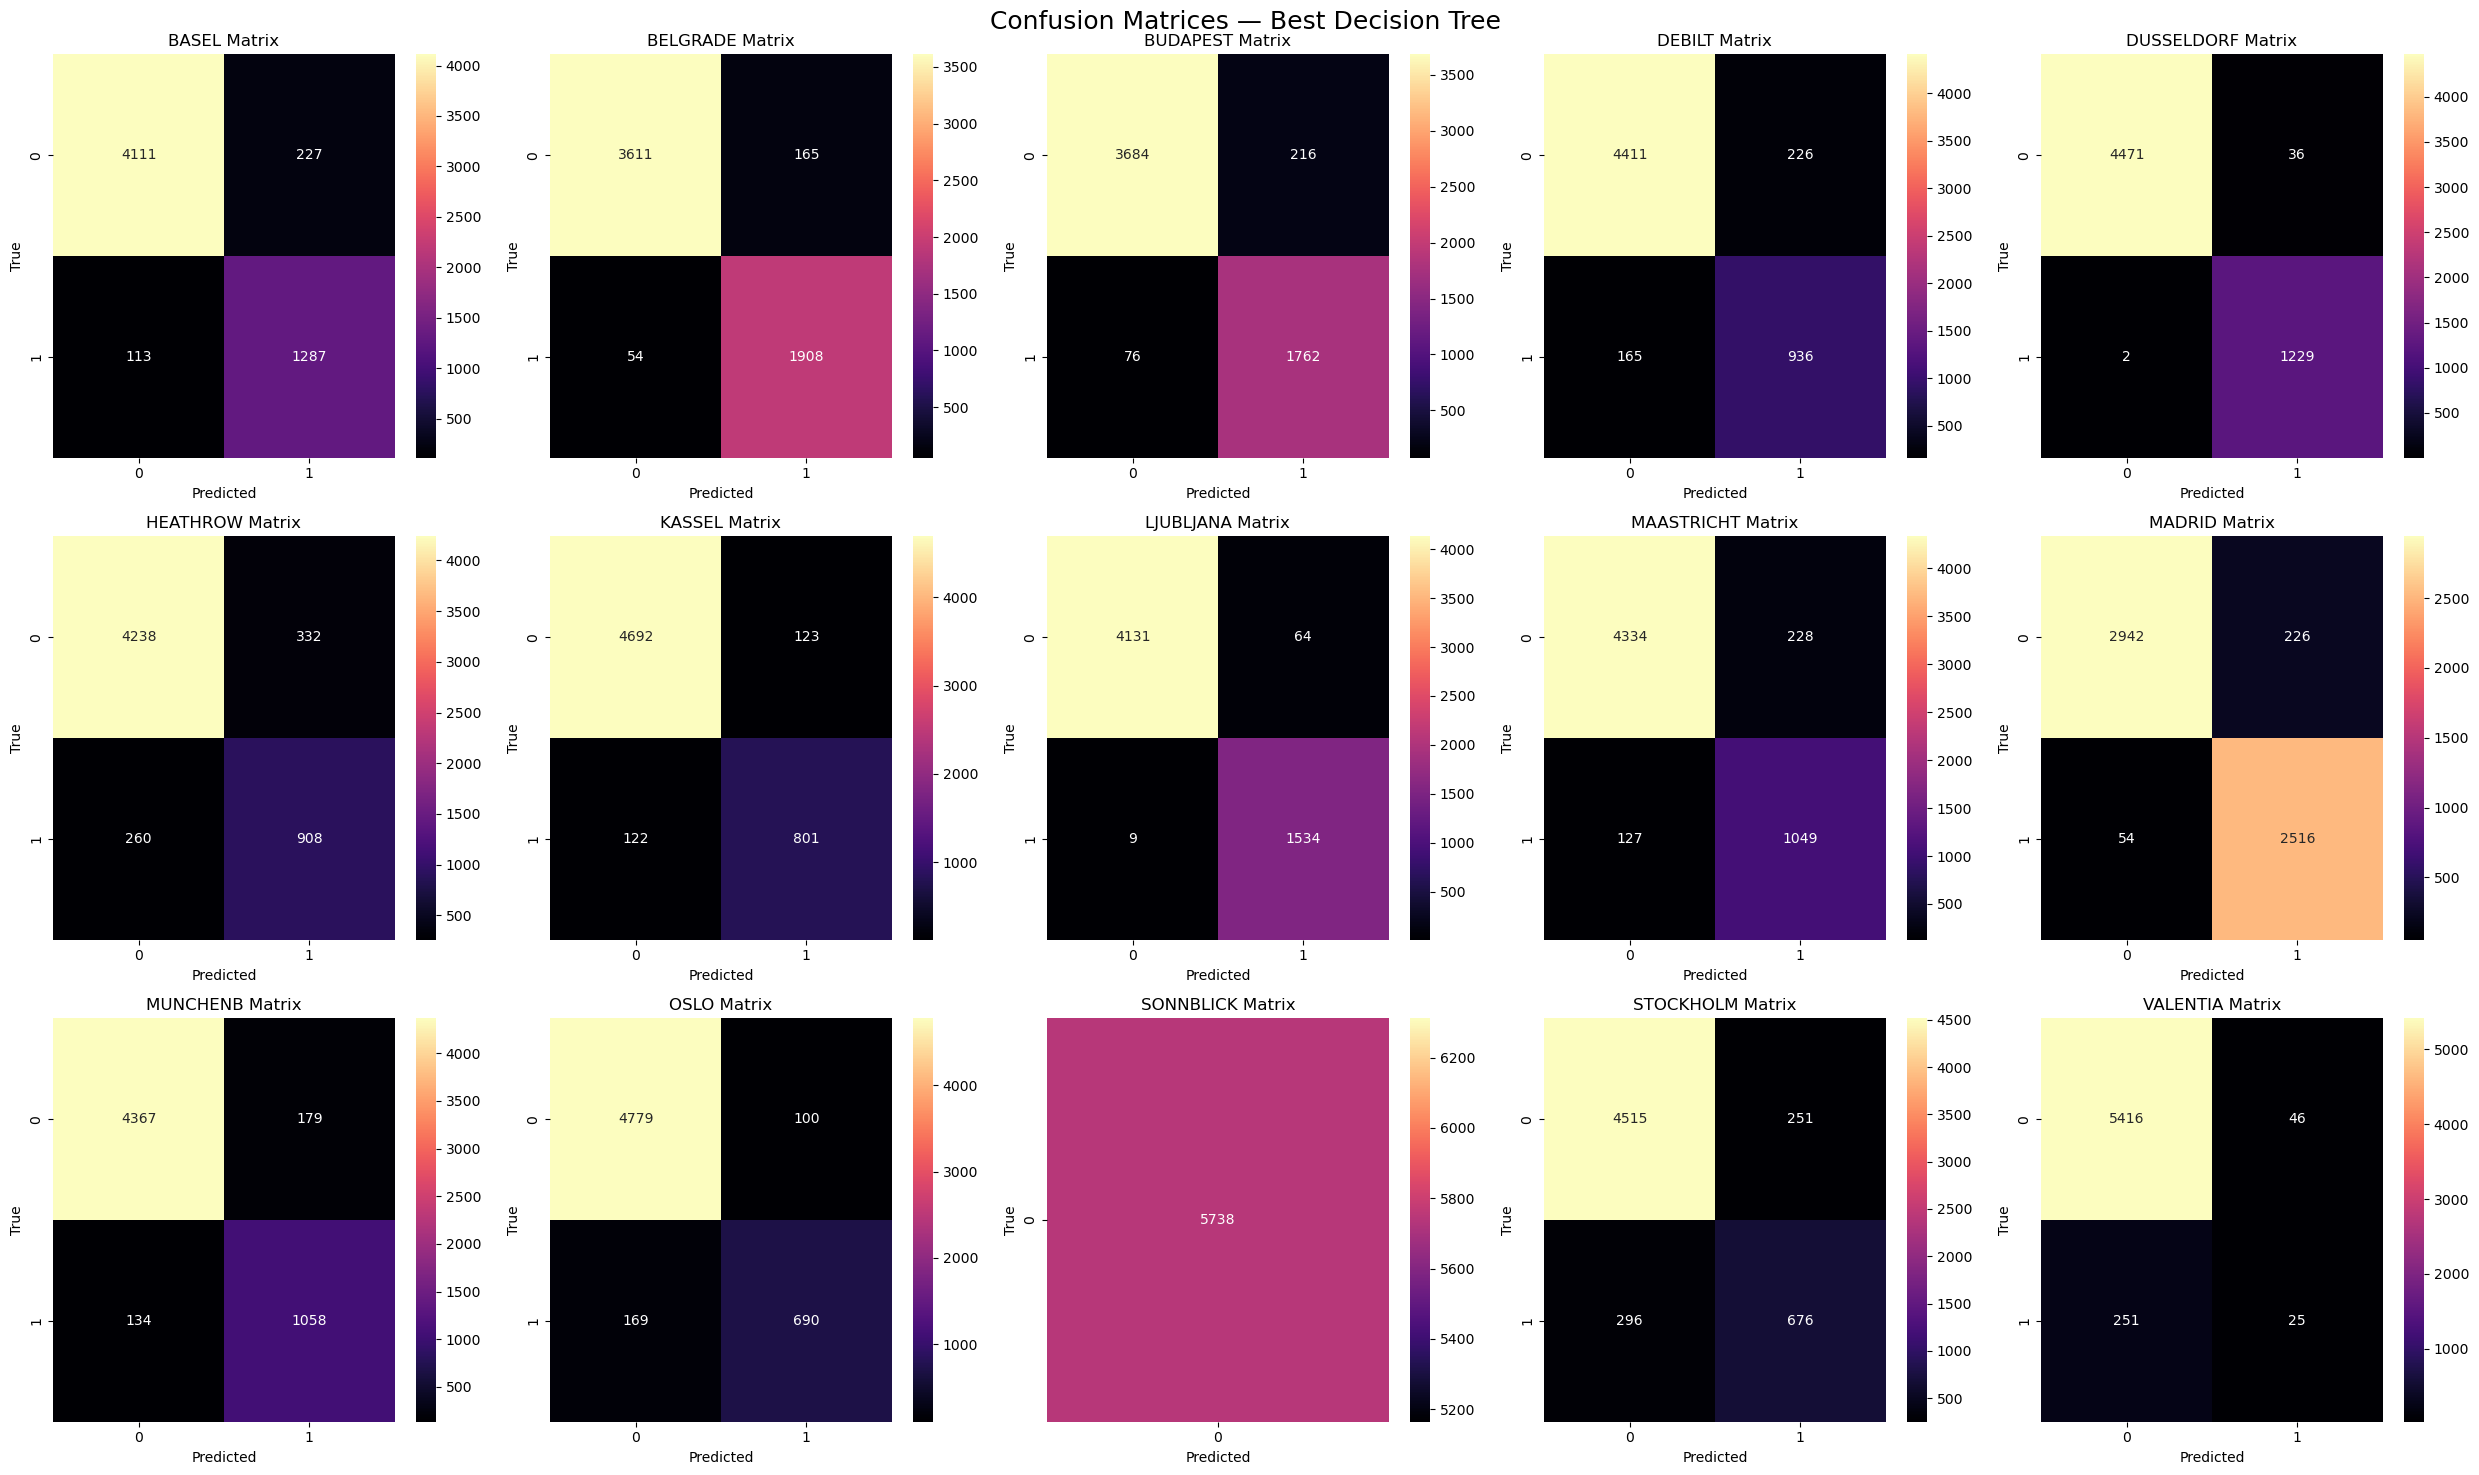

In [27]:
# Confusion matrices for BEST Decision Tree model (Scenario 2)

pleasant_suffix = "_pleasant_weather"
stations = [c.replace(pleasant_suffix, "") for c in y_test.columns]

fig, axes = plt.subplots(3, 5, figsize=(25, 15))
axes = axes.ravel()

for idx, station in enumerate(stations):
    true_labels = y_test.iloc[:, idx]
    pred_labels = best_y_pred_test[:, idx]   # <-- predictions from Scenario 2

    cm = confusion_matrix(true_labels, pred_labels)

    ax = axes[idx]
    sns.heatmap(cm, annot=True, fmt="g", cmap="magma", ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    ax.set_title(f"{station} Matrix")

# If the subplot grid has extra axes, hide them
for j in range(len(stations), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Confusion Matrices — Best Decision Tree", fontsize=18)

plt.tight_layout()

# Export plot
save_path = "/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/04 Analysis/Visualizations/DecisionTreeConfusionMatrix.png"
plt.savefig(save_path, dpi=300)
plt.show()


In [30]:
# Plot Accuracy table for the Confusion Matrix

rows = []

pleasant_suffix = "_pleasant_weather"
stations = [c.replace(pleasant_suffix, "") for c in y_test.columns]

for idx, station in enumerate(stations):
    true_labels = y_test.iloc[:, idx]
    pred_labels = best_y_pred_test[:, idx]   

    if len(np.unique(true_labels)) > 1 and len(np.unique(pred_labels)) > 1:
        cm = confusion_matrix(true_labels, pred_labels)
        
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
        else:
            # Handle non-2x2 matrix case
            tn = fp = fn = tp = 0
            if cm.shape[0] == 1 and cm.shape[1] == 1:  # Only one class in both true and predicted
                if np.unique(true_labels)[0] == 0:  # If that class is negative
                    tn = cm[0, 0]
                else:  # If that class is positive
                    tp = cm[0, 0]
    else:
        
        if np.unique(true_labels)[0] == np.unique(pred_labels)[0]:
            # If both have same class and it's negative
            if np.unique(true_labels)[0] == 0:
                tn = len(true_labels)
                tp = fp = fn = 0
            else:  # If both have same class and it's positive
                tp = len(true_labels)
                tn = fp = fn = 0
        else:
           
            if np.unique(true_labels)[0] == 0:  # True is all negative, pred is all positive
                fp = len(true_labels)
                tn = tp = fn = 0
            else:  # True is all positive, pred is all negative
                fn = len(true_labels)
                tn = tp = fp = 0

    # Calculate accuracy
    accuracy = (tn + tp) / (tn + fp + fn + tp) if (tn + fp + fn + tp) > 0 else 0

    rows.append({
        "Station": station,
        "Accurate 0 (TN)": tn,
        "Accurate 1 (TP)": tp,
        "False Pos (FP)": fp,
        "False Neg (FN)": fn,
        "Accuracy Rate (%)": round(accuracy * 100, 2)
    })

dt_accuracy_table = pd.DataFrame(rows)
dt_accuracy_table

,Station,Accurate 0 (TN),Accurate 1 (TP),False Pos (FP),False Neg (FN),Accuracy Rate (%)
0,BASEL,4111,1287,227,113,94.07
1,BELGRADE,3611,1908,165,54,96.18
2,BUDAPEST,3684,1762,216,76,94.91
3,DEBILT,4411,936,226,165,93.19
4,DUSSELDORF,4471,1229,36,2,99.34
5,HEATHROW,4238,908,332,260,89.68
6,KASSEL,4692,801,123,122,95.73
7,LJUBLJANA,4131,1534,64,9,98.73
8,MAASTRICHT,4334,1049,228,127,93.81
9,MADRID,2942,2516,226,54,95.12
